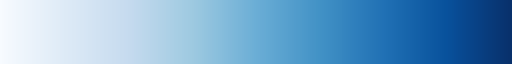

In [ ]:
import sys
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from IPython.display import display, Markdown

sys.path.append(os.path.abspath('../../'))
sns.color_palette("Blues", as_cmap=True)

In [ ]:
# Check if the folder exists
log_dir = os.path.join("..", "..", "logs", "vit_representations_fixed")
if not os.path.exists(log_dir):
    print(f"Folder '{log_dir}' does not exist.")
else:
    run_dirs = sorted(glob(os.path.join(log_dir, 'run_*')),
                      key=lambda x: int(os.path.basename(x).split('_')[1]))
    print(f"Found {len(run_dirs)} runs.")

Found 16 runs.


In [ ]:
max_accuracies = []
representations = []

for run_dir in run_dirs[1:]:
    val_csv = os.path.join(run_dir, 'validation_metrics.csv')
    train_csv = os.path.join(run_dir, 'train_metrics.csv')
    if os.path.exists(val_csv):
        df = pd.read_csv(val_csv)
        max_acc = df['acc/val'].max()
        run_num = os.path.basename(run_dir).split('_')[1]
        max_accuracies.append((int(run_num), max_acc))
    if os.path.exists(train_csv):
        df = pd.read_csv(train_csv)
        representation = df['representation'][0]
        representations.append(representation)

results = pd.DataFrame(max_accuracies, columns=['Run', 'Max Validation Accuracy'])

print("\nStatistical Summary of Max Validation Accuracies:")
print(results['Max Validation Accuracy'].describe())


Statistical Summary of Max Validation Accuracies:
count    15.000000
mean      0.812702
std       0.059392
min       0.718665
25%       0.754172
50%       0.813737
75%       0.881063
max       0.885914
Name: Max Validation Accuracy, dtype: float64



Grouped Statistics by Representation:
                count      mean       std       min       25%       50%  \
Representation                                                            
melspectrogram    5.0  0.811331  0.006443  0.802484  0.806752  0.813737   
mfcc              5.0  0.882887  0.002286  0.879705  0.882421  0.882421   
spectrogram       5.0  0.743888  0.014837  0.718665  0.745828  0.746605   

                     75%       max  
Representation                      
melspectrogram  0.816453  0.817229  
mfcc            0.883974  0.885914  
spectrogram     0.750873  0.757470  


C:\Users\jdudz\AppData\Local\Temp\ipykernel_11392\3718695273.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results, x='Max Validation Accuracy', y='Representation', palette='Blues', showfliers=False)


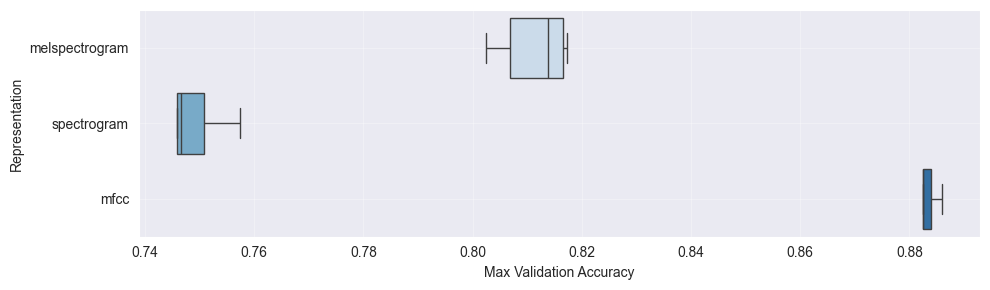

In [ ]:
results['Representation'] = representations

grouped_stats = results.groupby('Representation')['Max Validation Accuracy'].describe()

print("\nGrouped Statistics by Representation:")
print(grouped_stats)
plt.figure(figsize=(10, 3))
sns.boxplot(data=results, x='Max Validation Accuracy', y='Representation', palette='Blues', showfliers=False)

plt.ylabel('Representation')
plt.xlabel('Max Validation Accuracy')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('charts/binary/vit_repr_analysis.png')
plt.show()